# 1. Importing Required Libraries
In this section, I am importing libraries which will define how my dataset have been selected, modelled and visualised. They are as follows:

**- Pandas:** For data framing and manipulation
**- Numpy:** Used for numerical computing
**- Matplotlib:** For plotting graphs
**- Sklearn:** For using machine learning model libraries.
**- Torch:** Used for building and training neural networks with GPU acceleration.
**- Random:** Provides functions for generating random numbers, often used for data shuffling and initialization.
**- Seaborn:** Enables creation of visually appealing statistical plots for data analysis.
**- Copy:** Used for creating copies of objects to prevent unintended data mutation.
**- RandomizedSearchCV:** Conducts hyperparameter tuning using randomized search with cross-validation.
**- MLPClassifier:** Implements a multi-layer perceptron classifier for classification tasks.
**- Uniform, randint:** Probability distributions used for defining hyperparameter search spaces in optimization.
    

In [1]:
import torch
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform, randint

# 2. Loading Datasets and Exploration
In this section, I am going to load all the datasets to have a feel of what is actually inside it. To do this, I am using pandas to load it inside the dataframe for data manipulation. Additionally, I am also going to explore each dataset to produce suitable filtered data to see what can I make of it. This step is required as it seems the data provided is not optimal to be used. Hence, the following processes are executed in each of these datasets.
**-** Exploring pathways in the dataset, what features can be extracted, what can be done in accordance to the assignment criteria.
**-** Find any missing values, duplicates and null which can then be sorted out by dropping those elements.
**-** Using general stats such as mean, total, average etc. to group one or more rows for data's that feel like it can be further refined.

## 2.1 Consumer Prices Data
The following steps are performed
**-** Display the data
**-** Check to see if any of the columns can be further classfied into two or more groups to create new dataframes to retain more datapoints after merge.
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous checks

In [18]:
# Loading the datatset
consumer_prices_df = pd.read_csv("content/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

In [19]:
# Displaying the first few rows of the consumer prices data
consumer_prices_df.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [20]:
consumer_prices_df.shape

(112890, 17)

In [21]:
# Describing the consumer prices data
consumer_prices_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [22]:
# Printing information about the consumer price data
consumer_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [23]:
#Assigning new labels to same dataset to extract required dataset based on item or element filters
fpi_df = consumer_prices_df

In [24]:
#Assigning new labels to same dataset to extract required dataset based on item or element filters
cpi_df = consumer_prices_df

In [25]:
# Filtering data to only take food price inflation and from after the year 2010
fpi_df = fpi_df[(fpi_df['Year'] >= 2000) & fpi_df['Item'].str.contains('Food price inflation')]
cpi_df = cpi_df[(cpi_df['Year'] >= 2000) & cpi_df['Item'].str.contains('Consumer Prices, Food Indices (2015 = 100)', regex=False)]

# Dropping not required columns
fpi_df = fpi_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code','Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)', 'Note'])
cpi_df = cpi_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code','Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)', 'Note'])

# Averaging the value column based on area and year.
fpi_df = fpi_df.groupby(["Area", "Year"])["Value"].mean().reset_index()
cpi_df = cpi_df.groupby(["Area", "Year"])["Value"].mean().reset_index()



# Renaming the column to avoid confusion of value tables after merging.
fpi_df = fpi_df.rename(columns={'Value': 'Total Food Price Inflation'})
cpi_df = cpi_df.rename(columns={'Value': 'Total Consumer Prices'})

In [26]:
# checking rows and columns in the dataframe after splitting the data into two categories
fpi_df.shape

(4653, 3)

In [27]:
fpi_df

,Area,Year,Total Food Price Inflation
0,Afghanistan,2001,12.780692
1,Afghanistan,2002,18.254516
2,Afghanistan,2003,14.102244
3,Afghanistan,2004,14.072172
4,Afghanistan,2005,12.606240
...,...,...,...
4648,Åland Islands,2019,1.797736
4649,Åland Islands,2020,0.643114
4650,Åland Islands,2021,1.164459
4651,Åland Islands,2022,9.678792


In [28]:
# checking rows and columns in the dataframe after splitting the data into two categories
cpi_df.shape

(4856, 3)

In [29]:
cpi_df

,Area,Year,Total Consumer Prices
0,Afghanistan,2000,26.629848
1,Afghanistan,2001,29.893548
2,Afghanistan,2002,35.344892
3,Afghanistan,2003,40.203113
4,Afghanistan,2004,45.840561
...,...,...,...
4851,Åland Islands,2019,102.928436
4852,Åland Islands,2020,103.585137
4853,Åland Islands,2021,104.784347
4854,Åland Islands,2022,114.944128


In [32]:
# Checking for NaN values
fpi_df.isnull().sum()
cpi_df.isnull().sum()

Area                     0
Year                     0
Total Consumer Prices    0
dtype: int64

In [33]:
# Check for duplicates
duplicates_found_fpi = fpi_df.duplicated().sum()
duplicates_found_cpi = cpi_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found_fpi > 0 and duplicates_found_cpi > 0:
    fpi_df.drop_duplicates(inplace=True)
    cpi_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [36]:
fpi_df.shape

(4653, 3)

In [37]:
cpi_df.shape

(4856, 3)

In [38]:
fpi_df.head(100)

,Area,Year,Total Food Price Inflation
0,Afghanistan,2001,12.780692
1,Afghanistan,2002,18.254516
2,Afghanistan,2003,14.102244
3,Afghanistan,2004,14.072172
4,Afghanistan,2005,12.606240
...,...,...,...
95,Angola,2004,51.533639
96,Angola,2005,23.399672
97,Angola,2006,17.286257
98,Angola,2007,14.186884


In [39]:
cpi_df.head(100)

,Area,Year,Total Consumer Prices
0,Afghanistan,2000,26.629848
1,Afghanistan,2001,29.893548
2,Afghanistan,2002,35.344892
3,Afghanistan,2003,40.203113
4,Afghanistan,2004,45.840561
...,...,...,...
95,Andorra,2023,135.217328
96,Angola,2000,1.691044
97,Angola,2001,3.567232
98,Angola,2002,7.109792


## 2.2 Crops Production Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous checks

In [336]:
# load the dataset
crops_prod_df = pd.read_csv("content/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the crops prod use data
crops_prod_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [337]:
# Describe the crops prod data
crops_prod_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [338]:
crops_prod_df.shape

(41649, 15)

In [339]:
# Print information about the crops prod use data
crops_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [ ]:
# Assigning new labels to same dataset to extract required dataset based on item or element filters
cereals_df = crops_prod_df
citrus_df = crops_prod_df
fibre_df = crops_prod_df
fruit_df = crops_prod_df
oilcrops_df1 = crops_prod_df
oilcrops_df2 = crops_prod_df
pulses_df = crops_prod_df
roots_tubers_df = crops_prod_df
sugar_df = crops_prod_df
treenuts_df = crops_prod_df
vegetables_df = crops_prod_df

In [340]:
# Filtering data to only take value from after the year 2000 to streamline data
cereals_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Cereals, primary')]
citrus_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Citrus Fruit, Total')]
fibre_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Fibre Crops, Fibre Equivalent')]
fruit_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Fruit Primary')]
oilcrops_df1 = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Oilcrops, Cake Equivalent')]
oilcrops_df2 = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Oilcrops, Oil Equivalent')]
pulses_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Pulses, Total')]
roots_tubers_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Roots and Tubers, Total')]
sugar_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Sugar Crops Primary')]
treenuts_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Treenuts, Total')]
vegetables_df = cereals_df[(cereals_df['Year'] >= 2000) & cereals_df['Item'].str.contains('Vegetables Primary')]

# Dropping not required columns
cereals_df = cereals_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
citrus_df = citrus_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
fibre_df = fibre_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
fruit_df = fruit_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
oilcrops_df1 = oilcrops_df1.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
oilcrops_df2 = oilcrops_df2.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
pulses_df = pulses_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
roots_tubers_df = roots_tubers_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
sugar_df = sugar_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
treenuts_df = treenuts_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])
vegetables_df = vegetables_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])


# Renaming the column to avoid confusion of value tables after merging.
cereals_df = cereals_df.rename(columns={'Value': 'Total Cereal Production'})

In [341]:
crops_prod_df

,Area,Year,Total Crops and Livestock Yielded per 100g/ha
0,Afghanistan,2000,60177.909091
1,Afghanistan,2001,60701.272727
2,Afghanistan,2002,61135.363636
3,Afghanistan,2003,61209.181818
4,Afghanistan,2004,61449.454545
...,...,...,...
4582,Zimbabwe,2018,99997.818182
4583,Zimbabwe,2019,97301.000000
4584,Zimbabwe,2020,96519.272727
4585,Zimbabwe,2021,95493.181818


In [342]:
# Checking for NaN values
crops_prod_df.isnull().sum()

Area                                             0
Year                                             0
Total Crops and Livestock Yielded per 100g/ha    0
dtype: int64

In [343]:
# Check for duplicates
duplicates_found = crops_prod_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    crops_prod_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [344]:
crops_prod_df.shape

(4587, 3)

In [345]:
crops_prod_df.head(100)

,Area,Year,Total Crops and Livestock Yielded per 100g/ha
0,Afghanistan,2000,60177.909091
1,Afghanistan,2001,60701.272727
2,Afghanistan,2002,61135.363636
3,Afghanistan,2003,61209.181818
4,Afghanistan,2004,61449.454545
...,...,...,...
95,Antigua and Barbuda,2003,29464.750000
96,Antigua and Barbuda,2004,29476.875000
97,Antigua and Barbuda,2005,29665.500000
98,Antigua and Barbuda,2006,29696.500000


## 2.3 Emissions Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [346]:
# Load the dataset
emissions_df = pd.read_csv("content/Emissions - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the emissions data
emissions_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [347]:
# Describing the emissions data
emissions_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Source Code,Value,Note
count,28910.000000,28910.000000,28910.000000,28910.000000,28910.0,28910.000000,0.0
mean,432.519543,26168.457281,2010.522414,2010.522414,3050.0,636.696462,NaN
std,252.127600,29584.659513,6.342396,6.342396,0.0,6379.076614,NaN
min,4.000000,7230.000000,2000.000000,2000.000000,3050.0,0.000000,NaN
25%,214.000000,7230.000000,2005.000000,2005.000000,3050.0,0.000000,NaN
50%,428.000000,7273.000000,2011.000000,2011.000000,3050.0,0.021350,NaN
75%,646.000000,72430.000000,2016.000000,2016.000000,3050.0,3.655375,NaN
max,894.000000,72440.000000,2021.000000,2021.000000,3050.0,226389.853200,NaN


In [348]:
# Printing information about the emissions data
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

In [349]:
emissions_df.shape

(28910, 17)

In [350]:
# Filtering data to only take  and from after the year 2010
emissions_df = emissions_df[(emissions_df['Year'] >= 2000) & emissions_df['Item'].str.contains('All Crops')]

# Dropping not required columns
emissions_df = emissions_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

emissions_df = emissions_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
emissions_df = emissions_df.rename(columns={'Value': 'Total Crop Emissions'})

In [351]:
# Checking for NaN values
emissions_df.isnull().sum()

Area                    0
Year                    0
Total Crop Emissions    0
dtype: int64

In [352]:
# Check for duplicates
duplicates_found = emissions_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    emissions_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [353]:
emissions_df.shape

(4228, 3)

In [354]:
# display final dataset
emissions_df.head(100)

,Area,Year,Total Crop Emissions
0,Afghanistan,2000,10.77635
1,Afghanistan,2001,9.98295
2,Afghanistan,2002,11.16045
3,Afghanistan,2003,12.50670
4,Afghanistan,2004,15.69725
...,...,...,...
95,Antigua and Barbuda,2007,0.00005
96,Antigua and Barbuda,2008,0.00005
97,Antigua and Barbuda,2009,0.00005
98,Antigua and Barbuda,2010,0.00005


## 2.4 Employment Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [355]:
# Load the dataset
employment_df = pd.read_csv("content/Employment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the employment data
employment_df.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [356]:
# Describing the employment data
employment_df.describe()

,Area Code (M49),Indicator Code,Sex Code,Year Code,Year,Element Code,Source Code,Value
count,5917.000000,5917.000000,5917.0,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,427.420145,21145.763394,1.0,2010.890992,2010.890992,6191.358628,3037.136049,4536.367847
std,250.847292,2.733508,0.0,6.270884,6.270884,11.845202,9.126779,27086.237113
min,4.000000,21144.000000,1.0,2000.000000,2000.000000,6173.000000,3018.000000,0.170000
25%,208.000000,21144.000000,1.0,2006.000000,2006.000000,6173.000000,3023.000000,39.100000
50%,418.000000,21144.000000,1.0,2011.000000,2011.000000,6199.000000,3043.000000,126.540000
75%,642.000000,21150.000000,1.0,2016.000000,2016.000000,6199.000000,3043.000000,1386.380000
max,894.000000,21150.000000,1.0,2022.000000,2022.000000,6199.000000,3043.000000,358919.780000


In [357]:
# Printing information about the employment data
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [358]:
employment_df.shape

(5917, 19)

In [359]:
# Filtering data to only take  and from after the year 2010
employment_df = employment_df[(employment_df['Year'] >= 2000) & employment_df['Indicator'].str.contains('Employment in agriculture, forestry and fishing - ILO modelled estimates')]

# Dropping not required columns
employment_df = employment_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Indicator', 'Indicator Code', 'Sex', 'Sex Code', 'Element Code', 'Element', 'Source', 'Source Code', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# employment_df = employment_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
employment_df = employment_df.rename(columns={'Value': 'Total Employment'})

In [360]:
# Checking for NaN values
employment_df.isnull().sum()

Area                0
Year                0
Total Employment    0
dtype: int64

In [361]:
# Check for duplicates
duplicates_found = employment_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    employment_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [362]:
employment_df.shape

(4178, 3)

In [363]:
# display final dataset
employment_df.head(100)

,Area,Year,Total Employment
2,Afghanistan,2000,2765.95
3,Afghanistan,2001,2805.54
4,Afghanistan,2002,2897.51
5,Afghanistan,2003,3093.27
6,Afghanistan,2004,3212.46
...,...,...,...
114,Argentina,2008,1670.15
115,Argentina,2009,1639.59
116,Argentina,2010,1617.47
117,Argentina,2011,1598.24


## 2.5 Exchange Rates Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [456]:
# Load the dataset
exchange_rates_df = pd.read_csv("content/Exchange rate - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the exchange rates data
exchange_rates_df.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [457]:
# Describe the exchange rates data
exchange_rates_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [458]:
# Print information about the exchange rates data
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [459]:
exchange_rates_df.shape

(103276, 16)

In [460]:
# Filtering data to only take food price inflation and from after the year 2010
exchange_rates_df = exchange_rates_df[(exchange_rates_df['Year'] >= 2000)]

# Dropping not required columns
exchange_rates_df = exchange_rates_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'ISO Currency Code (FAO)', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

exchange_rates_df = exchange_rates_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
exchange_rates_df = exchange_rates_df.rename(columns={'Value': 'Total Exchange Rate per USD'})

In [461]:
# Checking for NaN values
exchange_rates_df.isnull().sum()

Area                           0
Year                           0
Total Exchange Rate per USD    0
dtype: int64

In [462]:
# If duplicates are found, remove them
if duplicates_found > 0:
    exchange_rates_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [463]:
exchange_rates_df.shape

(5069, 3)

In [464]:
# display final dataset
exchange_rates_df.head(100)

,Area,Year,Total Exchange Rate per USD
0,Afghanistan,2000,47357.574730
1,Afghanistan,2001,47500.014520
2,Afghanistan,2002,3981.907750
3,Afghanistan,2003,48.762754
4,Afghanistan,2004,47.845312
...,...,...,...
95,Angola,2001,22.057862
96,Angola,2002,43.530207
97,Angola,2003,74.606301
98,Angola,2004,83.541363


## 2.6 Fertilizers Used Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [372]:
# Load the dataset
fertilizers_use_df = pd.read_csv("content/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Fertilizers Used data
fertilizers_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [373]:
# Describe the Fertilizers Used data
fertilizers_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [374]:
# Print information about the Fertilizers Used data
fertilizers_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [375]:
fertilizers_use_df.shape

(17807, 14)

In [376]:
fertilizers_use_df = fertilizers_use_df[(fertilizers_use_df['Year'] >= 2000)]
fertilizers_use_df = fertilizers_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])

fertilizers_use_df = fertilizers_use_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

fertilizers_use_df = fertilizers_use_df.rename(columns={'Value': 'Total Fertilizers Used in Tonnes'})


In [377]:
# Check for missing values
fertilizers_use_df.isnull().sum()

Area                                0
Year                                0
Total Fertilizers Used in Tonnes    0
dtype: int64

In [378]:
# If duplicates are found, remove them
if duplicates_found > 0:
    exchange_rates_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [379]:
# display final dataset
fertilizers_use_df.head(100)

,Area,Year,Total Fertilizers Used in Tonnes
0,Afghanistan,2002,17900.000000
1,Afghanistan,2003,33200.000000
2,Afghanistan,2004,45000.000000
3,Afghanistan,2005,20577.000000
4,Afghanistan,2006,68253.000000
...,...,...,...
95,Australia,2013,369481.000000
96,Australia,2014,433516.000000
97,Australia,2015,446052.416667
98,Australia,2016,397817.750000


In [380]:
fertilizers_use_df.shape

(1933, 3)

## 2.7 Food Balance Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [381]:
food_balances_df = pd.read_csv("content/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food balances data
food_balances_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [382]:
# Describing the food balances data
food_balances_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,148041.000000,148041.000000,148041.000000,148041.000000,148041.000000
mean,425.675185,5429.812417,2015.549274,2015.549274,957.153400
std,251.359288,324.840991,3.452477,3.452477,9591.749593
min,4.000000,5123.000000,2010.000000,2010.000000,-62.000000
25%,204.000000,5142.000000,2013.000000,2013.000000,1.000000
50%,417.000000,5154.000000,2016.000000,2016.000000,25.000000
75%,642.000000,5611.000000,2019.000000,2019.000000,218.190000
max,894.000000,5911.000000,2021.000000,2021.000000,573218.000000


In [383]:
# Printing information about the food balances data
food_balances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [384]:
food_balances_df.shape

(148041, 14)

In [385]:
# Filtering data to only take  and from after the year 2010
food_balances_df = food_balances_df[(food_balances_df['Year'] >= 2000) & (food_balances_df['Element'].str.contains('Export Quantity'))]

# Further filter to exclude items that contain bewlo entries not produced from crops
food_balances_df = food_balances_df[~food_balances_df['Item'].str.contains('Fish, Seafood', case=False, na=False)]
food_balances_df = food_balances_df[~food_balances_df['Item'].str.contains('Meat', case=False, na=False)]
food_balances_df = food_balances_df[~food_balances_df['Item'].str.contains('Eggs', case=False, na=False)]
food_balances_df = food_balances_df[~food_balances_df['Item'].str.contains('Milk - Excluding Butter', case=False, na=False)]

# Dropping not required columns
food_balances_df = food_balances_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (FBS)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])

food_balances_df = food_balances_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
food_balances_df = food_balances_df.rename(columns={'Value': 'Total Crop Based Food Balance per 1000t'})

In [386]:
# Checking for NaN values
food_balances_df.isnull().sum()

Area                                       0
Year                                       0
Total Crop Based Food Balance per 1000t    0
dtype: int64

In [387]:
# Check for duplicates
duplicates_found = food_balances_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    food_balances_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [388]:
food_balances_df.shape

(2176, 3)

In [389]:
# display final dataset
food_balances_df.head(100)

,Area,Year,Total Crop Based Food Balance per 1000t
0,Afghanistan,2010,40.000000
1,Afghanistan,2011,30.777778
2,Afghanistan,2012,22.000000
3,Afghanistan,2013,31.222222
4,Afghanistan,2014,34.333333
...,...,...,...
95,Australia,2021,3992.076923
96,Austria,2010,445.846154
97,Austria,2011,451.846154
98,Austria,2012,462.076923


## 2.8 Food Security Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [390]:
food_security_df = pd.read_csv("content/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food security data
food_security_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [391]:
# Describing the food security data
food_security_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,36512.000000,36512.000000,36512.000000,3.651200e+04,36512.000000
mean,424.835342,6122.999233,21030.970777,9.691701e+06,37.620671
std,252.424973,2.662834,11.014761,1.004127e+07,67.159815
min,4.000000,6121.000000,21010.000000,2.000000e+03,-654.900000
25%,204.000000,6121.000000,21030.000000,2.010000e+03,5.000000
50%,417.000000,6121.000000,21032.000000,2.020000e+03,18.700000
75%,642.000000,6125.000000,21035.000000,2.009201e+07,58.700000
max,894.000000,6128.000000,21049.000000,2.020202e+07,5735.000000


In [392]:
# Printing information about the food security data
food_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB


In [393]:
food_security_df.shape

(36512, 15)

In [394]:
food_security_df = food_security_df[(food_security_df['Year'] >= "2000") & (food_security_df['Item Code'] == 21031)]

# Dropping not required columns
food_security_df = food_security_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Renaming the column to avoid confusion of value tables after merging.
food_security_df = food_security_df.rename(columns={'Value': 'Total Food Supply Variability per Capita'})

In [395]:
# Checking for NaN values
food_security_df.isnull().sum()

Area                                        0
Year                                        0
Total Food Supply Variability per Capita    0
dtype: int64

In [396]:
# Check for duplicates
duplicates_found = food_security_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    food_security_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")


No duplicates found.


In [397]:
food_security_df.shape

(3776, 3)

In [398]:
# display final dataset
food_security_df.head(100)

,Area,Year,Total Food Supply Variability per Capita
140,Afghanistan,2000,58.0
141,Afghanistan,2001,47.0
142,Afghanistan,2002,71.0
143,Afghanistan,2003,72.0
144,Afghanistan,2004,50.0
...,...,...,...
1196,Argentina,2006,92.0
1197,Argentina,2007,61.0
1198,Argentina,2008,57.0
1199,Argentina,2009,47.0


## 2.9 Food Trade Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [399]:
# Load the dataset
food_trade_df = pd.read_csv("content/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Food Trade data
food_trade_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [400]:
# Describe the Food Trade data
food_trade_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [401]:
# Print information about the Food Trade data
food_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [402]:
food_trade_df.shape

(141738, 15)

In [403]:
# Filtering data to only take  and from after the year 2010
food_trade_df = food_trade_df[(food_trade_df['Year'] >= 2000) & (food_trade_df['Element'].str.contains('Export Value'))]

# Further filter to exclude items that contain bewlo entries not produced from crops
food_trade_df = food_trade_df[~food_trade_df['Item'].str.contains('Dairy Products and Eggs', case=False, na=False)]
food_trade_df = food_trade_df[~food_trade_df['Item'].str.contains('Meat and Meat Preparations', case=False, na=False)]

food_trade_df = food_trade_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

food_trade_df = food_trade_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

food_trade_df = food_trade_df.rename(columns={'Value': 'Total Crop Export Value per 1000 USD'})

food_trade_df.head()

,Area,Year,Total Crop Export Value per 1000 USD
0,Afghanistan,2000,8619.0
1,Afghanistan,2001,7088.0
2,Afghanistan,2002,7192.8
3,Afghanistan,2003,11756.4
4,Afghanistan,2004,12983.8


In [404]:
# Check for missing values
food_trade_df.isnull().sum()

Area                                    0
Year                                    0
Total Crop Export Value per 1000 USD    0
dtype: int64

In [405]:
# Check for duplicates
duplicates_found = food_trade_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    food_trade_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [406]:
food_trade_df.shape

(4474, 3)

## 2.10 FDI Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.


In [407]:
# Load the dataset
fdi_df = pd.read_csv("content/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the FDI data
fdi_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [408]:
# Describe the FDI data
fdi_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,12276.000000,12276.0,12276.000000,12276.000000,12276.000000,12276.000000
mean,420.778674,6110.0,23082.692978,2011.305148,2011.305148,5230.433618
std,248.237052,0.0,1.745190,6.470153,6.470153,23875.653754
min,4.000000,6110.0,23080.000000,2000.000000,2000.000000,-322053.781300
25%,204.000000,6110.0,23082.000000,2006.000000,2006.000000,4.914940
50%,410.000000,6110.0,23082.000000,2012.000000,2012.000000,93.866445
75%,626.000000,6110.0,23085.000000,2017.000000,2017.000000,1116.813653
max,894.000000,6110.0,23085.000000,2022.000000,2022.000000,467625.000000


In [409]:
# Print information about the FDI data
fdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       12276 non-null  object 
 1   Domain            12276 non-null  object 
 2   Area Code (M49)   12276 non-null  int64  
 3   Area              12276 non-null  object 
 4   Element Code      12276 non-null  int64  
 5   Element           12276 non-null  object 
 6   Item Code         12276 non-null  int64  
 7   Item              12276 non-null  object 
 8   Year Code         12276 non-null  int64  
 9   Year              12276 non-null  int64  
 10  Unit              12276 non-null  object 
 11  Value             12276 non-null  float64
 12  Flag              12276 non-null  object 
 13  Flag Description  12276 non-null  object 
 14  Note              12276 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.4+ MB


In [410]:
fdi_df.shape

(12276, 15)

In [411]:
fdi_df = fdi_df[(fdi_df['Year'] >= 2000) & fdi_df['Item'].str.contains('Total FDI inflows')]

fdi_df = fdi_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

fdi_df = fdi_df.rename(columns={'Value': 'Total FDI Inflows per million USD'})

In [412]:
# Checking for NaN values
fdi_df.isnull().sum()

Area                                 0
Year                                 0
Total FDI Inflows per million USD    0
dtype: int64

In [413]:
# Check for duplicates
duplicates_found = fdi_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    fdi_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [414]:
fdi_df.shape

(4566, 3)

In [415]:
# display final dataset
fdi_df.head(100)

,Area,Year,Total FDI Inflows per million USD
0,Afghanistan,2000,0.170000
1,Afghanistan,2001,0.680000
2,Afghanistan,2002,50.000000
3,Afghanistan,2003,57.800000
4,Afghanistan,2004,186.900000
...,...,...,...
200,Anguilla,2004,91.750519
201,Anguilla,2005,118.584133
202,Anguilla,2006,143.182989
203,Anguilla,2007,120.132137


## 2.11 Land Temp Change Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.


In [447]:
# Load the dataset
land_temp_change_df = pd.read_csv("content/Land temperature change - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Land Temp Change data
land_temp_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [448]:
# Describe the Land Temp Change data
land_temp_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [449]:
# Print information about the Land Temp Change data
land_temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [450]:
land_temp_change_df.shape

(54810, 14)

In [451]:
land_temp_change_df = land_temp_change_df[(land_temp_change_df['Year'] >= 2000) & (land_temp_change_df['Months'].str.contains('Meteorological year')) & (land_temp_change_df['Element Code'] == 7271)]

land_temp_change_df = land_temp_change_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

land_temp_change_df = land_temp_change_df.rename(columns={'Value': 'Total Land Temperature Change in °C'})

In [452]:
# Check for missing values
land_temp_change_df.isnull().sum()

Area                                     0
Year                                     0
Total Land Temperature Change in °C    262
dtype: int64

In [453]:
# Check for duplicates
duplicates_found = land_temp_change_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    land_temp_change_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [454]:
land_temp_change_df.shape

(5481, 3)

In [455]:
# display final dataset
land_temp_change_df.head(100)

,Area,Year,Total Land Temperature Change in °C
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373
...,...,...,...
1107,Andorra,2003,1.949
1108,Andorra,2004,0.936
1109,Andorra,2005,0.851
1110,Andorra,2006,1.485


## 2.12 Land Use Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check and merging them based on Country (i.e., Area ) and Year.

In [425]:
# Load the dataset
land_use_df = pd.read_csv("content/Land use - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Land Use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [426]:
# Describe the Land Use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [427]:
# Print information about the Land Use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [428]:
land_use_df.shape

(97995, 15)

In [429]:
land_use_df = land_use_df[(land_use_df['Year'] >= 2000) & land_use_df['Item'].str.contains('Cropland')]

land_use_df = land_use_df[~land_use_df['Item'].str.contains('Cropland area actually irrigated', case=False, na=False)]

land_use_df = land_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

land_use_df = land_use_df.rename(columns={'Value': 'Total Land Use per 1000/ha'})

In [430]:
# Check for NaN values
land_use_df.isnull().sum()

Area                          0
Year                          0
Total Land Use per 1000/ha    0
dtype: int64

In [431]:
# Check for duplicates
duplicates_found = land_use_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    land_use_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [432]:
land_use_df.shape

(4921, 3)

In [433]:
# display final dataset
land_use_df.head(100)

,Area,Year,Total Land Use per 1000/ha
188,Afghanistan,2000,7794.00
189,Afghanistan,2001,7795.00
190,Afghanistan,2002,7790.00
191,Afghanistan,2003,7884.00
192,Afghanistan,2004,7928.00
...,...,...,...
2067,Andorra,2007,0.77
2068,Andorra,2008,0.76
2069,Andorra,2009,0.77
2070,Andorra,2010,0.77


## 2.13 Pesticides Use Data
The following steps are performed
**-** Display the data
**-** Describe the data
**-** Print Data Types
**-** Checking for Null Values, Duplicates
**-** Filtering Data by Dropping the columns from previous check

In [434]:
# Load the dataset
pesticides_use_df = pd.read_csv("content/Pesticides use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [435]:
# Describing the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [436]:
# Printing information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [437]:
pesticides_use_df.shape

(35202, 15)

In [438]:
# Filtering data to only take  and from after the year 2010
pesticides_use_df = pesticides_use_df[(pesticides_use_df['Year'] >= 2000) & (pesticides_use_df['Element'].str.contains('Agricultural Use')) & (pesticides_use_df['Item'].str.contains('Pesticides (total)', regex=False))]

# Dropping not required columns
pesticides_use_df = pesticides_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Renaming the column to avoid confusion of value tables after merging.
pesticides_use_df = pesticides_use_df.rename(columns={'Value': 'Total Pesticides Used in Tonnes'})

In [439]:
# Checking for NaN values
pesticides_use_df.isnull().sum()

Area                               0
Year                               0
Total Pesticides Used in Tonnes    0
dtype: int64

In [440]:
# Check for duplicates
duplicates_found = pesticides_use_df.duplicated().sum()

# If duplicates are found, remove them
if duplicates_found > 0:
    pesticides_use_df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [441]:
pesticides_use_df.shape

(4636, 3)

In [465]:
# display final dataset
pesticides_use_df.head(100)

,Area,Year,Total Pesticides Used in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57
...,...,...,...
667,Anguilla,2007,48.62
668,Anguilla,2008,58.04
669,Anguilla,2009,65.91
670,Anguilla,2010,65.91


## Merging Datasets for Correlation Checks
Based on the target variable **"food trade indicators"**, I am going to correlate which dataset has the highest matching rate with my target variable so that I can use that to predict the export value and get higher precision and accuracy. I will also be discarding datasets that have negative correlation or not near to my target variable (i.e., it's not that it is not useful, negative correlation can be taken as well but I am assuming that I will only take positive instances of it to make it easier to train the model.)

In [467]:
food_security_df['Year'] = food_security_df['Year'].astype(int) 
target = food_trade_df
required_dataframes = [crops_prod_df, consumer_prices_df, employment_df, food_balances_df, food_security_df, emissions_df, exchange_rates_df, fertilizers_use_df, fdi_df, land_temp_change_df, land_use_df, pesticides_use_df]
for df in required_dataframes:
    target = pd.merge(target, df, left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='inner')
target_corr = target.drop('Area', axis=1)
required_features_corr = target_corr.corr()

In [468]:
target.shape

(835, 15)

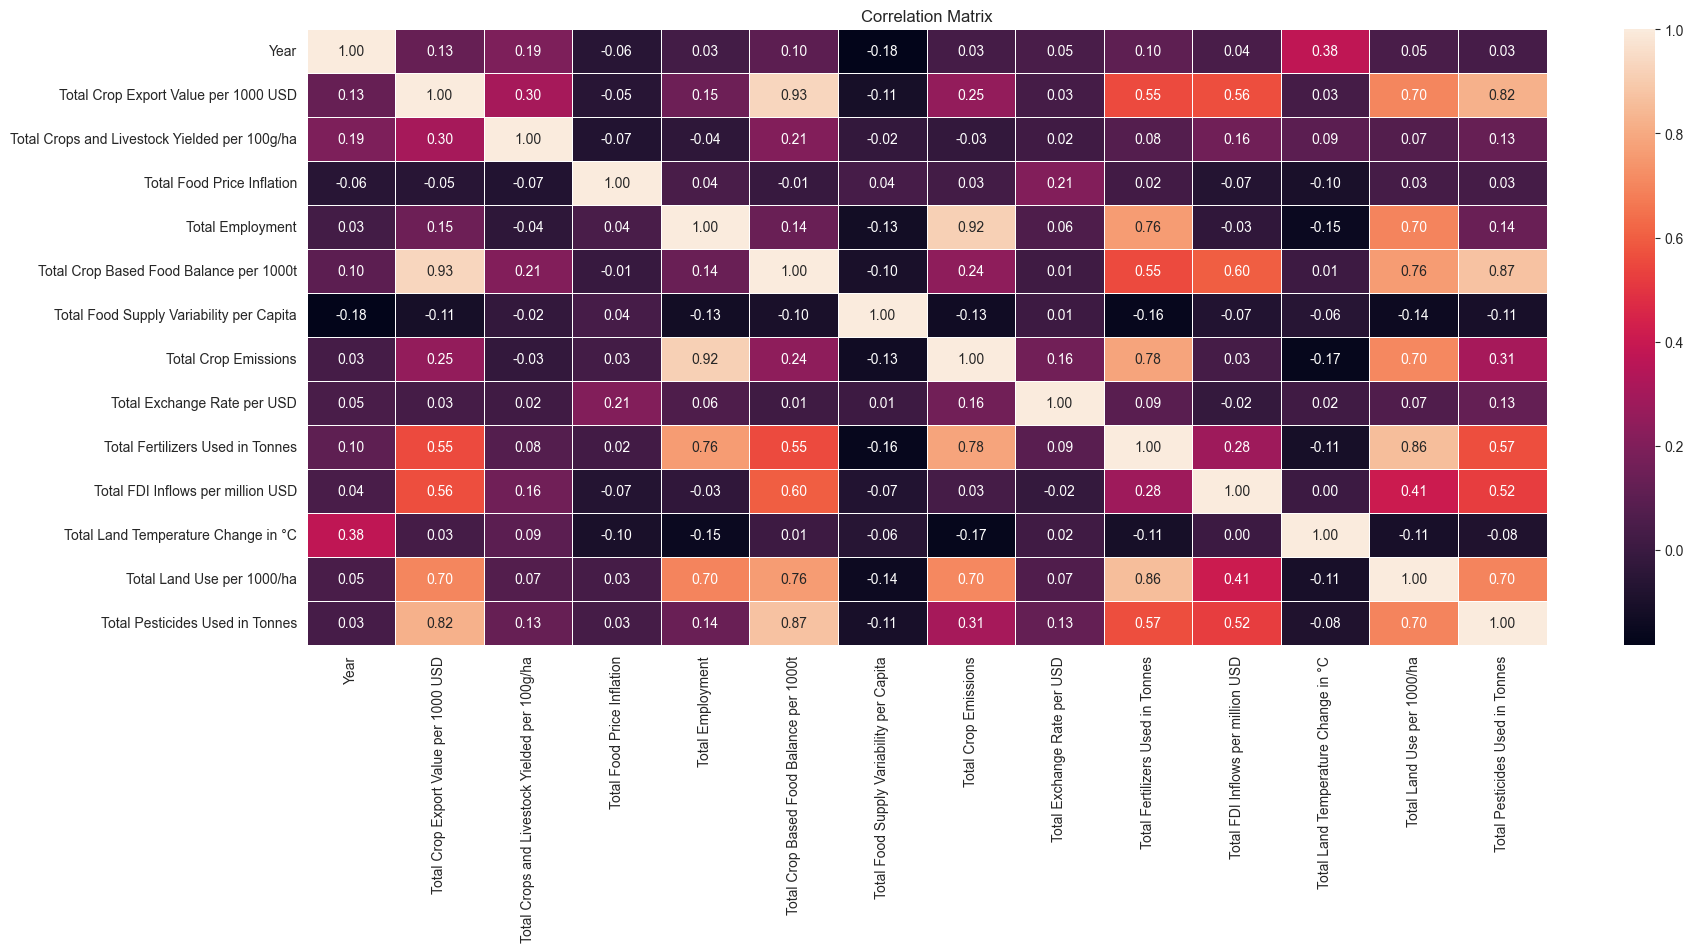

In [566]:
plt.figure(figsize=(20, 8))
sns.heatmap(required_features_corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The above correlation shows that except for dataframes such as exchange_rate_df, land_temp_use_df, consumer_price_df, food_security_df all the other dataframes shows high correlation with respect to total export value. This resulted in a lot of datapoints being discarded due to inner join properties. Hence, I will merge the dataframe's again but with selective dataframes which are highly correlated to predicting the export value of crops even more and can retain much of the datapoints.

In [472]:
# Print the correlation values with the target variable
required_features_corr['Total Crop Export Value per 1000 USD'].sort_values(ascending=False)

Total Crop Export Value per 1000 USD             1.000000
Total Crop Based Food Balance per 1000t          0.934708
Total Pesticides Used in Tonnes                  0.821728
Total Land Use per 1000/ha                       0.700549
Total FDI Inflows per million USD                0.562817
Total Fertilizers Used in Tonnes                 0.553198
Total Crops and Livestock Yielded per 100g/ha    0.303152
Total Crop Emissions                             0.254300
Total Employment                                 0.148912
Year                                             0.129345
Total Exchange Rate per USD                      0.032401
Total Land Temperature Change in °C              0.031854
Total Food Price Inflation                      -0.054575
Total Food Supply Variability per Capita        -0.112190
Name: Total Crop Export Value per 1000 USD, dtype: float64

Merging dataframes again with just ones with strong correlations to get bigger data size.

In [580]:
target_df = food_trade_df
new_merge = [crops_prod_df, food_balances_df, fertilizers_use_df, fdi_df, land_use_df, pesticides_use_df, food_security_df]
for df in new_merge:
    target_df = pd.merge(target_df, df, left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='inner')

In [581]:
target_df.shape

(852, 10)

In [582]:
target_df

,Area,Year,Total Crop Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Crop Based Food Balance per 1000t,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes,Total Food Supply Variability per Capita
0,Albania,2010,5609.700000,102745.727273,3.230769,22947.400000,1050.714858,696.0,590.50,44.0
1,Albania,2011,8063.300000,108613.272727,4.307692,26066.800000,876.271104,696.0,582.68,63.0
2,Albania,2012,8415.200000,112625.363636,5.615385,25001.600000,855.435093,696.0,361.62,63.0
3,Albania,2013,11029.800000,107375.090909,6.846154,19481.713333,1254.930606,696.3,450.60,38.0
4,Albania,2014,9698.972857,113253.272727,10.222222,19481.666667,1154.690314,696.0,457.47,23.0
...,...,...,...,...,...,...,...,...,...,...
847,Zambia,2021,96283.113000,148215.800000,78.615385,194259.350000,-122.000000,3839.0,4196.64,30.0
848,Zimbabwe,2010,122787.600000,85084.454545,18.461538,11731.214286,166.000000,4100.0,3305.17,32.0
849,Zimbabwe,2011,184251.300000,89278.727273,15.538462,9578.428571,387.000000,4300.0,3340.35,31.0
850,Zimbabwe,2017,185975.789000,96210.363636,18.909091,10817.000000,349.000000,4100.0,2185.07,60.0


In [583]:
nan_counts = target_df.isna().sum()

print(nan_counts)

Area                                             0
Year                                             0
Total Crop Export Value per 1000 USD             0
Total Crops and Livestock Yielded per 100g/ha    0
Total Crop Based Food Balance per 1000t          0
Total Fertilizers Used in Tonnes                 0
Total FDI Inflows per million USD                0
Total Land Use per 1000/ha                       0
Total Pesticides Used in Tonnes                  0
Total Food Supply Variability per Capita         0
dtype: int64


In [584]:
merged_df = target_df.groupby(["Area", "Year"]).mean().reset_index()

In [585]:
merged_df.shape

(852, 10)

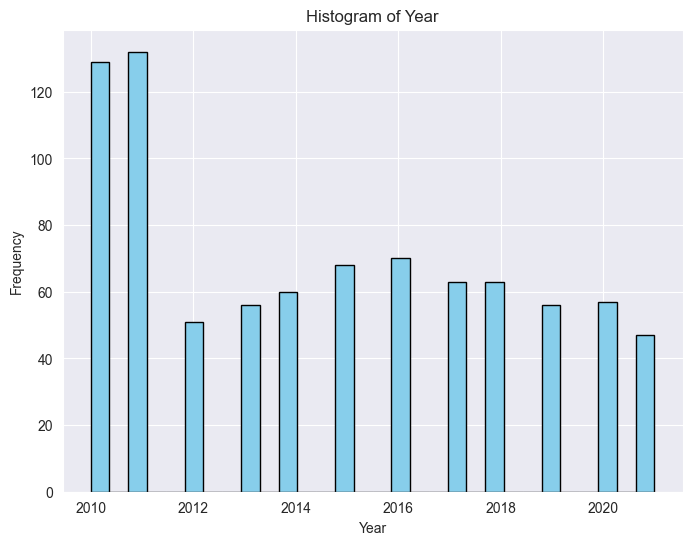

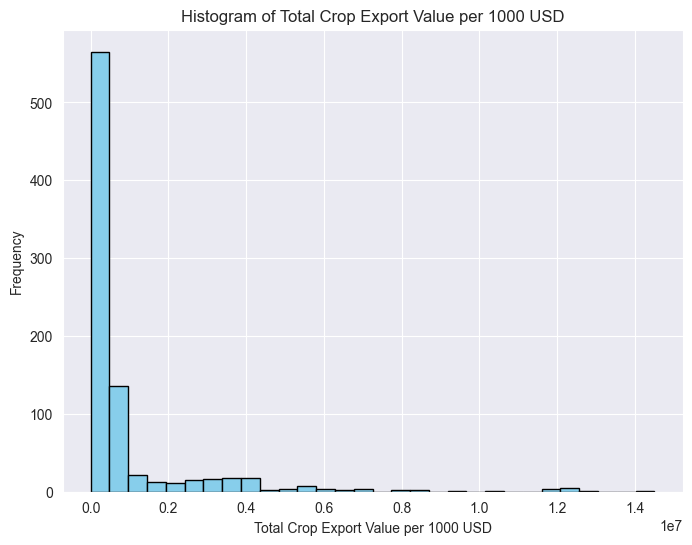

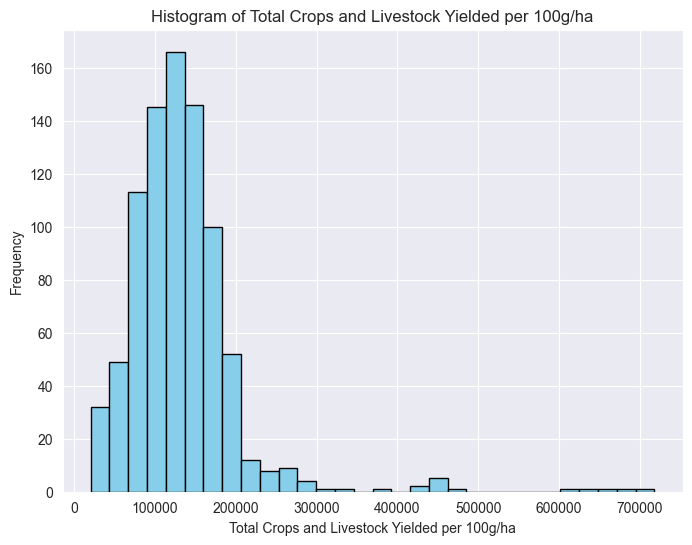

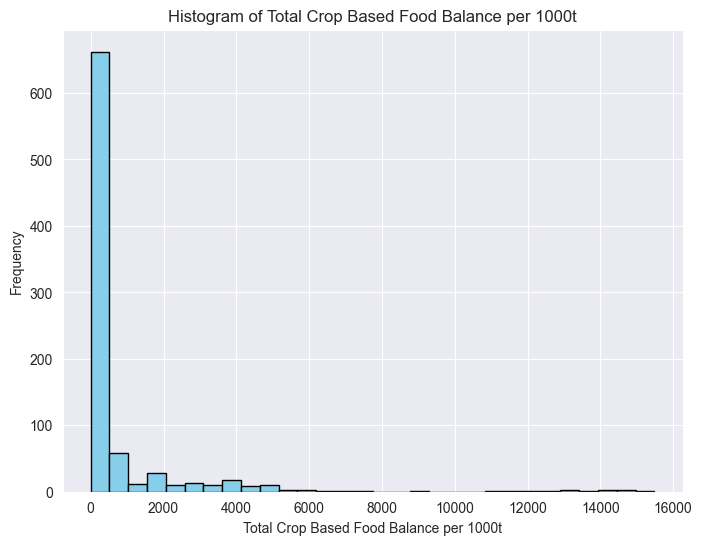

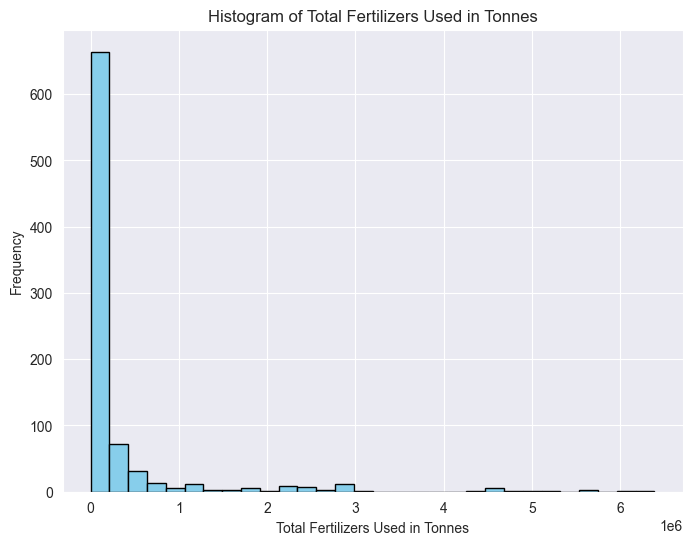

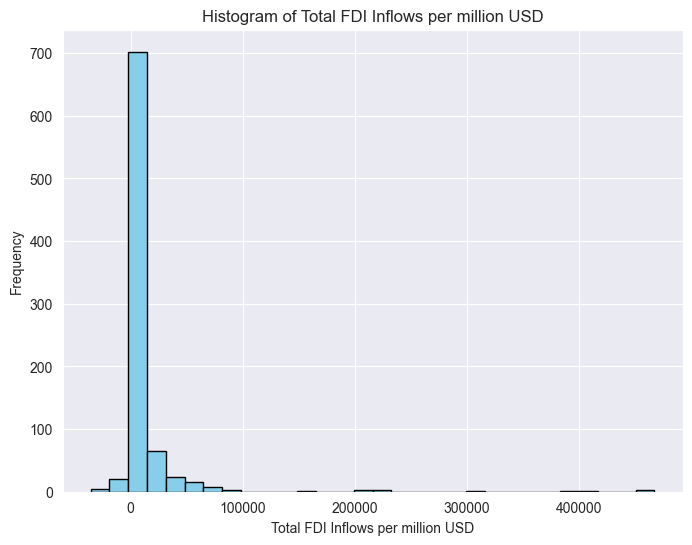

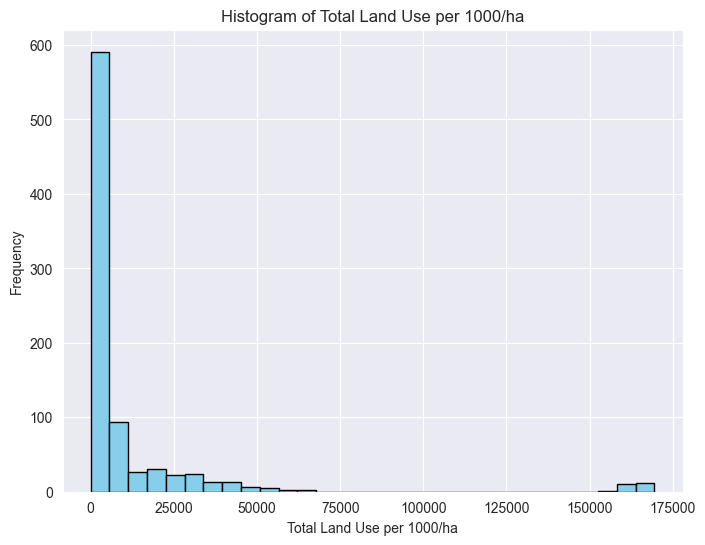

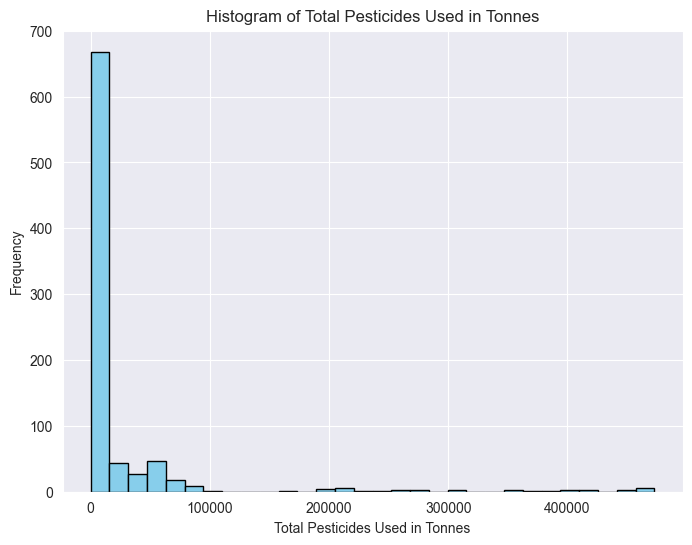

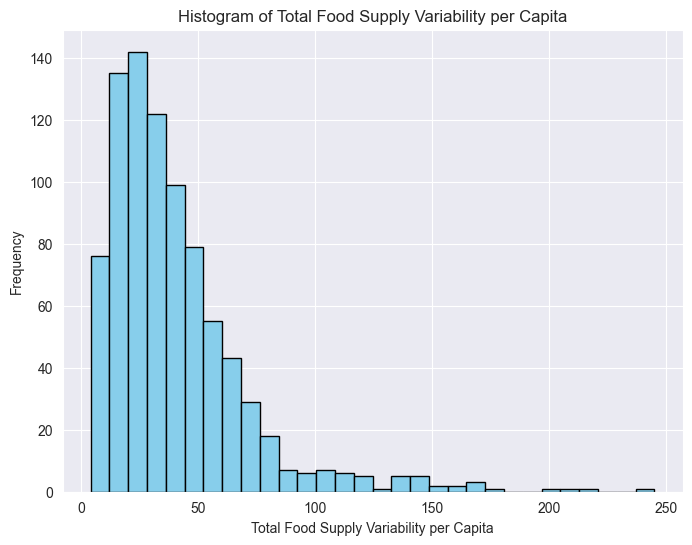

In [586]:
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:  # Check if the column contains numerical data
        plt.figure(figsize=(8, 6))
        plt.hist(merged_df[column], bins=30, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

### Generalising Labels
Generalising columns Area and Year to numbered indexes. 

In [587]:
offset = 1
merged_df['Area'] = pd.factorize(merged_df['Area'])[0] + offset

offset = 1  # Choose the desired offset
merged_df['Year'] = pd.factorize(merged_df['Year'])[0] + offset

merged_df

,Area,Year,Total Crop Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Crop Based Food Balance per 1000t,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes,Total Food Supply Variability per Capita
0,1,1,5609.700000,102745.727273,3.230769,22947.400000,1050.714858,696.0,590.50,44.0
1,1,2,8063.300000,108613.272727,4.307692,26066.800000,876.271104,696.0,582.68,63.0
2,1,3,8415.200000,112625.363636,5.615385,25001.600000,855.435093,696.0,361.62,63.0
3,1,4,11029.800000,107375.090909,6.846154,19481.713333,1254.930606,696.3,450.60,38.0
4,1,5,9698.972857,113253.272727,10.222222,19481.666667,1154.690314,696.0,457.47,23.0
...,...,...,...,...,...,...,...,...,...,...
847,137,12,96283.113000,148215.800000,78.615385,194259.350000,-122.000000,3839.0,4196.64,30.0
848,138,1,122787.600000,85084.454545,18.461538,11731.214286,166.000000,4100.0,3305.17,32.0
849,138,2,184251.300000,89278.727273,15.538462,9578.428571,387.000000,4300.0,3340.35,31.0
850,138,8,185975.789000,96210.363636,18.909091,10817.000000,349.000000,4100.0,2185.07,60.0


In [588]:
merged_df.describe()

,Area,Year,Total Crop Export Value per 1000 USD,Total Crops and Livestock Yielded per 100g/ha,Total Crop Based Food Balance per 1000t,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes,Total Food Supply Variability per Capita
count,852.000000,852.000000,8.520000e+02,852.000000,852.000000,8.520000e+02,852.000000,852.000000,852.000000,852.000000
mean,69.913146,5.622066,9.198824e+05,132573.915501,780.199020,3.040649e+05,10227.582346,11458.982076,25268.865399,40.548122
std,39.213411,3.572368,1.925293e+06,70939.137472,1942.355977,8.018205e+05,37553.473995,28341.183630,70439.397227,30.269006
min,1.000000,1.000000,3.348000e+02,20197.777778,0.000000,0.000000e+00,-35743.719060,1.463000,0.690000,4.000000
25%,36.000000,2.000000,6.528170e+04,92311.204545,33.842949,1.003340e+04,442.458321,741.375000,861.322500,21.000000
50%,69.000000,5.000000,2.325904e+05,125016.772727,122.000000,3.838105e+04,1645.146303,2417.139000,3448.345000,33.000000
75%,103.250000,9.000000,7.049387e+05,156969.934091,446.426282,1.735000e+05,6955.579898,8556.250000,13697.000000,51.000000
max,138.000000,12.000000,1.450684e+07,718138.000000,15482.076923,6.388340e+06,467625.000000,169463.000000,472977.150000,245.000000


In [589]:
data = merged_df.to_numpy()
data.shape

(852, 10)

In [590]:
# getting features and labels from the data
label_col_crop_export_value = 2

# recoding labels into classes
# sun - 2 classes
crop_export_value = np.zeros(data.shape[0])
crop_export_value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [591]:
for i in np.arange(data.shape[0]):

    if data[i, label_col_crop_export_value] < 10000:

        crop_export_value[i] = 0

    elif data[i, label_col_crop_export_value] > 10000 and data[i, label_col_crop_export_value] < 800000:

        crop_export_value[i] = 1

    else:

        crop_export_value[i] = 2


# taking a peek
print("\n A peek at the crop export value labels: \n"+str(crop_export_value))


 A peek at the crop export value labels: 
[0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 2. 2. 2. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 2. 2. 0. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1

### Training, Validation and Testing Sets
Splitting data into training, testing and validation sets for building MLP model

In [592]:


all_dfs = np.arange(0, data.shape[0])

random_seed = 1

# First randomly splitting the data into 80:20 to get the test set
rem_set_ids, test_set_ids = train_test_split(all_dfs, test_size=0.2, train_size=0.8,
                                             random_state=random_seed, shuffle=True)


# Then further splitting the remaining data 80:20 into training and validation sets
train_set_ids, val_set_ids = train_test_split(rem_set_ids, test_size=0.2, train_size=0.8,
                                              random_state=random_seed, shuffle=True)


train_data = data[train_set_ids, :]
train_label_col_crop_export_value = crop_export_value[train_set_ids]


val_data = data[val_set_ids, :]
val_label_col_crop_export_value = crop_export_value[val_set_ids]


test_data = data[test_set_ids, :]
test_label_col_crop_export_value = crop_export_value[test_set_ids]

### Scaling/Normalization
Now we scale the merged dataset to fit inside the range of -1 to 1 to make even spaced data points.

In [593]:



scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_val_data = scaler.transform(val_data)
scaled_test_data = scaler.transform(test_data)

print("\n A peek at the scaled features: \n"+str(scaled_train_data))


 A peek at the scaled features: 
[[-6.61630227e-01  1.78419601e+00  2.63183476e+00 ...  2.06100197e-01
   5.01335196e-01  7.71429573e-01]
 [ 4.55681831e-01  1.50703935e+00 -4.56190506e-01 ... -3.33526192e-01
  -3.71381859e-01 -3.58070509e-01]
 [-1.40037440e-03  1.21256039e-01 -3.92452114e-01 ... -3.68838101e-01
  -3.60889007e-01 -5.19427664e-01]
 ...
 [ 1.09051823e+00 -9.87370607e-01 -3.53356466e-01 ... -3.17238364e-01
  -3.47502882e-01  4.03084409e+00]
 [-4.58482580e-01 -9.87370607e-01 -4.71350315e-01 ... -2.92213335e-01
  -3.71613204e-01  2.19137253e+00]
 [-9.91745153e-01 -9.87370607e-01 -4.67866490e-01 ... -4.05232838e-01
  -3.63238297e-01  3.15951546e+00]]


### Visualising the labels
Here, we visualise the labels based on class frequencies and how evenly distributed it is.

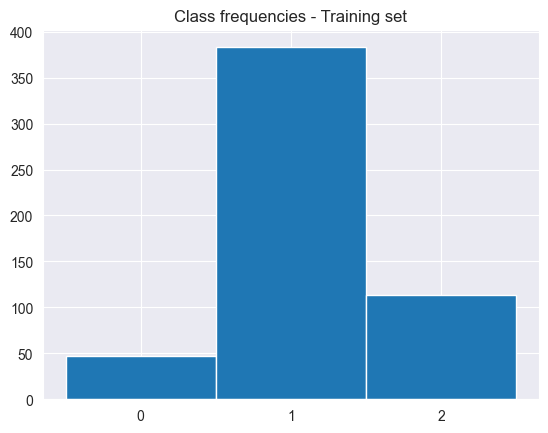

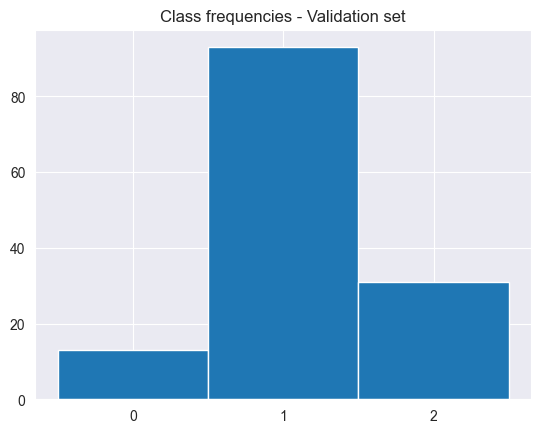

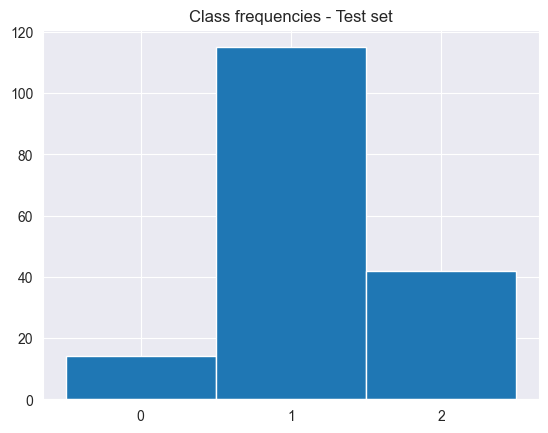

In [594]:


def plot_label_distr(labels, plot_title):
    plt.figure()
    the_bin_centres = np.unique(labels)
    plt.hist(labels, bins=the_bin_centres.shape[0], range=(the_bin_centres[0]-0.5, the_bin_centres[the_bin_centres.shape[0]-1]+0.5))
    plt.xticks(the_bin_centres)
    plt.title(plot_title)
    plt.show()
    print('\n')

plot_label_distr(train_label_col_crop_export_value, 'Class frequencies - Training set')
plot_label_distr(val_label_col_crop_export_value, 'Class frequencies - Validation set')
plot_label_distr(test_label_col_crop_export_value, 'Class frequencies - Test set')

### Building MLP Model and Evaluation
Here based on the train/test/val split data we will now commence to build our Multi Layer Perceptron Model to predict export values of crops and evaluate the model using techniques such as f1_scores 

In [595]:


# To ensure reproducibility
# for PyTorch operations that use random numbers internally
random.seed(random_seed)
torch.manual_seed(random_seed)

# Creating the network structure
class three_layer_MLP(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_layer_sizes,
                 output_size):
        super().__init__()
        self.hidden_l1 = nn.Linear(input_size, hidden_layer_sizes[0])
        self.hidden_l2 = nn.Linear(hidden_layer_sizes[0], hidden_layer_sizes[1])
        self.output_l3 = nn.Linear(hidden_layer_sizes[1], output_size)


    def forward(self, inputs):
        out = self.hidden_l1(inputs)
        out = self.hidden_l2(out)
        out = self.output_l3(out)
        out = torch.softmax(out, 1)
        return out


# A method for computing performance metrics of interest
def my_metrics(labels, predictions, show_confusion_matrix=False):

    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted

    predictions_numpy = predictions.detach().numpy()
    predicted_classes = np.argmax(predictions_numpy, axis=1)


    f1_scores = f1_score(labels, predicted_classes, average=None)
    acc = accuracy_score(labels, predicted_classes)

    if show_confusion_matrix:
        print("\n Confusion matrix:")
        confus_mat = confusion_matrix(labels, predicted_classes)
        disp = ConfusionMatrixDisplay(confus_mat)
        disp.plot()
        plt.show()

    return f1_scores, acc


# A class for managing the data for training the model
class MetDataset(Dataset):
    def __init__(self, feats, labels):
        # Converting features and labels from numpy arrays to PyTorch tensors
        self.feats = torch.tensor(feats, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):

        return self.feats[idx, :], self.labels[idx]

### Using Random Search for best hyperparameter tuning

In [598]:


# Define the hyperparameter search space
param_dist = {
    'learning_rate_init': uniform(0.001, 0.1),  # Example range for learning rate
    'batch_size': randint(32, 256),             # Example range for batch size
    'max_iter': randint(10, 50)                  # Example range for number of epochs
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=MLPClassifier(hidden_layer_sizes=(30,30)),  # Example MLP model
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=5,       # Cross-validation folds
    scoring='accuracy',  # Performance metric
    random_state=42
)

# Perform random search
random_search.fit(scaled_train_data, train_label_col_crop_export_value)

# Get the best hyperparameters
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)

C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (24) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\amany\MLP\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergen

Best Hyperparameters: {'batch_size': 134, 'learning_rate_init': 0.04558327528535912, 'max_iter': 32}
Best Accuracy: 0.9154604145429832


### Running Experiments on MLP Model to Predict Export Value of Crops
Now we will input the train data into the MLP model to predict and check the accuracy of the model to predict the export value of crops.

Found improvement in performance. New model saved.
epoch: 0 - train loss: 1.0768 train acc: 0.00 val loss: 1.0872 val acc: 0.42
Found improvement in performance. New model saved.
epoch: 1 - train loss: 1.0365 train acc: 0.88 val loss: 1.0658 val acc: 0.64
Found improvement in performance. New model saved.
epoch: 2 - train loss: 0.9940 train acc: 1.00 val loss: 1.0434 val acc: 0.75
Found improvement in performance. New model saved.
epoch: 3 - train loss: 0.9502 train acc: 1.00 val loss: 1.0203 val acc: 0.76
Found improvement in performance. New model saved.
epoch: 4 - train loss: 0.9062 train acc: 1.00 val loss: 0.9968 val acc: 0.77
epoch: 5 - train loss: 0.8635 train acc: 1.00 val loss: 0.9733 val acc: 0.77
epoch: 6 - train loss: 0.8233 train acc: 1.00 val loss: 0.9504 val acc: 0.77
epoch: 7 - train loss: 0.7867 train acc: 1.00 val loss: 0.9286 val acc: 0.77
Found improvement in performance. New model saved.
epoch: 8 - train loss: 0.7543 train acc: 1.00 val loss: 0.9084 val acc: 0.77
e

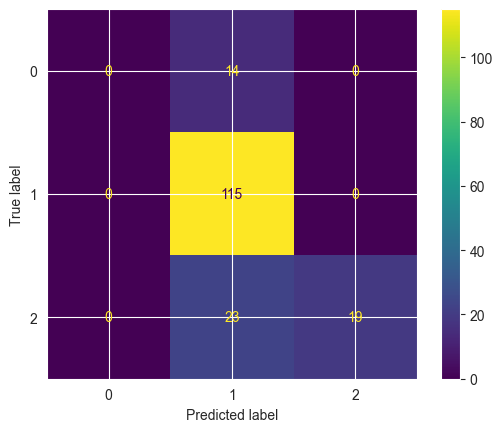


 test accuracy: 0.78

 The F1 scores for each of the classes are: [0.         0.86142322 0.62295082]

 Loss graph:


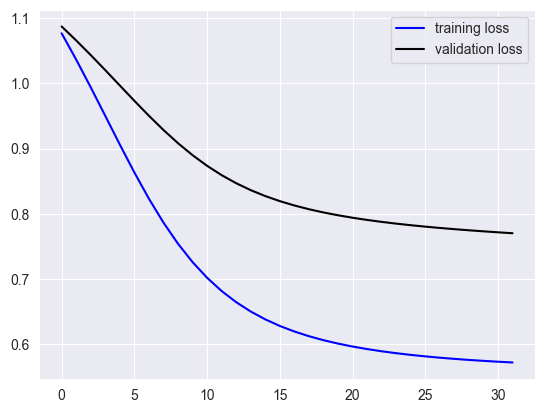

In [599]:
# Creating an instance of the MLP network
feature_count = train_data.shape[1]
hidden_layer_sizes = [30, 30]
class_count = np.unique(train_label_col_crop_export_value).shape[0]
model = three_layer_MLP(feature_count, hidden_layer_sizes, class_count)


# Setting hyperparameters
num_epochs = 32
learning_rate = 0.04558327528535912
batch_size = 134


# Setting up the data loading by batch
# With the test and validation sets having only one batch
train_set = MetDataset(scaled_train_data, train_label_col_crop_export_value)
train_dataloader = DataLoader(train_set, batch_size=batch_size)

val_set = MetDataset(scaled_val_data, val_label_col_crop_export_value)
val_dataloader = DataLoader(val_set, batch_size=len(val_set))

test_set = MetDataset(scaled_test_data, test_label_col_crop_export_value)
test_dataloader = DataLoader(test_set, batch_size=len(test_set))



# Setting up the SGD optimizer for updating the model weights
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


# Computing cross entropy loss against the training labels
loss_function = nn.CrossEntropyLoss()



best_model_acc = 0
losses = []

# Iterating over the dataset at two different staages:
# 1. Iterating over the batches in the dataset (inner for loop below)
# One complete set of iteration through the dataset (i.e. having gone over
# all batches in the dataset at least once) = One epoch
# 2. Iterating over the specified numeber of epochs (outer for loop below)
for epoch in range(0, num_epochs):

    # Setting the model to training mode
    model.train()

    if epoch == 0:  best_model = deepcopy(model)

    for batch, (X_train, y_train) in enumerate(train_dataloader):

        # Zeroing out the `.grad` buffers,
        # otherwise on the backward pass we'll add the
        # new gradients to the old ones.
        optimizer.zero_grad()

        # Computing the forward pass and then the loss
        train_pred = model.forward(X_train)
        train_loss = loss_function(train_pred, y_train)
        train_avg_f1_score, train_acc = my_metrics(y_train, train_pred)

        # Computing the model parameters' gradients
        # and propagating the loss backwards through the network.
        train_loss.backward()

        # Updating the model parameters using those gradients
        optimizer.step()

    # Evaluating on the validation set
    model.eval()
    for batch, (X_val, y_val) in enumerate(val_dataloader):
        val_pred = model.forward(X_val)
        val_loss = loss_function(val_pred, y_val)
        val_avg_f1_score, val_acc = my_metrics(y_val, val_pred)

    if val_acc > best_model_acc:
        best_model_acc = val_acc
        best_model = deepcopy(model)
        print('Found improvement in performance. New model saved.')

    # How well the network does on the batches
    # is an indication of how well training is progressing
    print("epoch: {} - train loss: {:.4f} train acc: {:.2f} val loss: {:.4f} val acc: {:.2f}".format(
        epoch,
        train_loss.item(),
        train_acc,
        val_loss.item(),
        val_acc ))

    losses.append([train_loss.item(), val_loss.item()])

model = best_model

# Finally we can test our model on the test set and get an estimate of its performance.
# First set the model to evaluation mode
model.eval()
for batch, (X_test, y_test) in enumerate(test_dataloader):
    test_pred = model.forward(X_test)
    test_f1_scores, test_accuracy = my_metrics(y_test, test_pred, show_confusion_matrix=True)
    print("\n test accuracy: {:2.2f}".format(test_accuracy))
    test_pred_numpy = test_pred.detach().numpy()
    print('\n The F1 scores for each of the classes are: '+str(test_f1_scores))

    print("\n Loss graph:")
    fig, ax = plt.subplots()
    losses = np.array(losses)
    ax.plot(losses[:, 0], 'b-', label='training loss')
    ax.plot(losses[:, 1], 'k-', label='validation loss')
    plt.legend(loc='upper right')
